In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def csv_to_numpy(path):
  df = pd.read_csv(path, sep=' ').sort_values(by=['V'])
  arr = df.to_numpy().transpose()
  ret = {'I': [], 'V': []}
  ret['I'] = arr[1]
  ret['V'] = arr[0]
  return ret

def build_graphs(paths, V_2, syms):
  data = [csv_to_numpy(path) for path in paths]
  plt.figure(figsize=[20, 10])
  FONTSIZE = 18

  for frame, v2, s in zip(data, V_2, syms):
    I, V = frame['I'], frame['V']

    plt.xlabel('$V_a$, В', fontsize=FONTSIZE)
    plt.ylabel('$I_k$, дел', fontsize=FONTSIZE)
    plt.plot(V, I, f'{s}-', label=f'$V_2$ = {v2} В')
    plt.yticks(np.linspace(0, 100, 21))
    plt.xticks(np.linspace(0, 70, 29))
    plt.legend()
  plt.grid()
  plt.show()

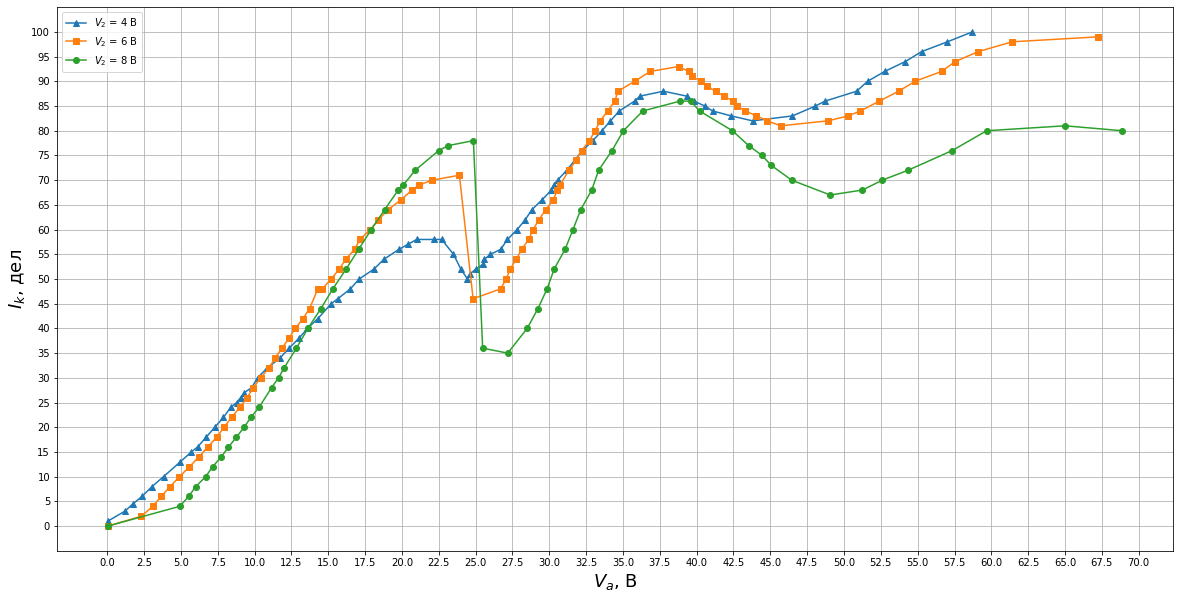

In [3]:
data_path = 'src/csv/'
V = [4, 6, 8]
build_graphs([data_path + str(v) + '.csv' for v in V], V, ['^', 's', 'o'])

In [23]:
V_max = np.array([
  37.5 - 22.5,
  39 - 23.90,
  40 - 25
])
print(V_max)
V_min = np.array([
  45 - 24.5,
  47.5 - 25,
  50 - 27.5
])
print(V_min)
sigmaV1 = np.sqrt(3)
sigmaV2max = np.std(V_max)
sigmaV2min = np.std(V_min)
sVmax = np.sqrt(sigmaV1**2 + sigmaV2max**2)
sVmin = np.sqrt(sigmaV1**2 + sigmaV2min**2)
print(sVmax, sVmin)
print(np.mean(V_max), np.mean(V_min))
V_av = np.mean([np.mean(V_max), np.mean(V_min)])
sVav = np.sqrt(sVmax**2 + sVmin**2 + np.std([np.mean(V_max), np.mean(V_min)])**2)
print(f'V = {V_av} +- {sVav}')
print(sVav / V_av)
print(sVav + V_av)

[15.  15.1 15. ]
[20.5 22.5 22.5]
1.7326921891156033 1.9720265943665385
15.033333333333333 21.833333333333332
V = 18.433333333333334 +- 4.295475655979336
0.23302761244010867
22.728808989312668


In [21]:
a = np.array([13, 18])
np.sqrt(np.std(a)**2 + 8)

3.774917217635375

[Это спиздить](./src/pics/tab.png), и то что ниже (см [саморез](https://github.com/BlackSamorez/mipt_lab/blob/master/5.2.1/pdf/Karpova_T.pdf))

In [202]:
av_delta_max = 13.7
av_delta_min = 17.5
sigma = 2.5

print(f'Delta V_min = {av_delta_min} +- {sigma}')
print(f'Delta V_max = {av_delta_max} +- {sigma}')
print(f'V_exp = {np.mean([av_delta_max, av_delta_min])} +- {sigma * np.sqrt(2)}')

Delta V_min = 17.5 +- 2.5
Delta V_max = 13.7 +- 2.5
V_exp = 15.6 +- 3.5355339059327378
